# Bachelor Arbeit Julian Mezger 

## Auswertung der Umfragedaten mit Hilfe der muliplen linearen Regressions-Analyse

Anbei der ausführbare Python Code für die Auswertung der Daten. 

## Import der benutzten Python Packages.

In [32]:
#Pandas für "DataFrames". Diese DataFrames sind wie Excel-Spreadsheets
import pandas as pd

#SciKit Learn ist eine freie Bibliothek für Machine Learning, inklusive Regression
# https://de.wikipedia.org/wiki/Scikit-learn

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Abschalten der Warnungen (zur Übersichtlichkeit der Ausgaben)
import warnings
warnings.filterwarnings('ignore')

#Package  statsmodels  für die Exploration von Daten und Evaluierung statistischer Modelle
import statsmodels.api as sm
from scipy import stats

#Packages zur graphischen Ausgabe
import matplotlib.pyplot as plt
import seaborn as sb

!jt -dfs  8 -cellw 1100 

## Einlesen der Auswertungsdaten aus Excel.

In [33]:
# Lesen der Umfragedaten: in das DataFrame df werden die Excel Daten geladen
df=pd.read_excel('Umfragedaten.xlsx')

## Ausgabe der ersten und letzten 5 Auswertungen für die Stichproben.

In [34]:
# Die Variable df ist ein DataFrame, das die Auswertungen aus dem XLSX File beinhaltet.
df.head(5)

,Anstrengungserwartung,erleichterte_Bedingungen,finanzielle_Allgemeinbildung,Leistungserwartung,sozialer_Einfluss,Verwendungsabsicht,wahrgenommenes_Risiko
0,4.50,4.75,3.5,4.666667,4.666667,5.0,3.666667
1,3.50,2.75,4.0,1.000000,2.000000,2.0,4.333333
2,2.50,3.25,5.0,3.000000,3.000000,3.0,5.000000
3,3.25,3.75,4.0,2.000000,1.000000,2.0,5.000000
4,2.75,3.00,2.0,2.666667,2.000000,2.0,4.000000


In [23]:
df.tail(5)

,Anstrengungserwartung,erleichterte_Bedingungen,finanzielle_Allgemeinbildung,Leistungserwartung,sozialer_Einfluss,Verwendungsabsicht,wahrgenommenes_Risiko
100,3.00,3.25,4.0,2.666667,2.000000,4.0,4.000000
101,3.00,2.50,3.0,1.666667,1.333333,2.0,3.333333
102,3.00,2.25,4.0,1.000000,1.000000,1.0,5.000000
103,2.25,3.00,4.0,1.000000,2.666667,1.0,4.000000
104,3.75,3.25,4.0,1.000000,1.000000,1.0,5.000000


## Vorbereitung der Features (unabhängigen Variablen) für die die Erstellung der Regressionsanalyse. Sie werden in die DataFrame X geschrieben. Ebenso wird das Target (abhängige Variable) "Verwendungsabsicht" in das DataFrame y kopiert.

In [24]:
X=df[['Leistungserwartung','Anstrengungserwartung', 'sozialer_Einfluss', 'erleichterte_Bedingungen', 'wahrgenommenes_Risiko', 'finanzielle_Allgemeinbildung']]
y=df[['Verwendungsabsicht']]
X

,Leistungserwartung,Anstrengungserwartung,sozialer_Einfluss,erleichterte_Bedingungen,wahrgenommenes_Risiko,finanzielle_Allgemeinbildung
0,4.666667,4.50,4.666667,4.75,3.666667,3.5
1,1.000000,3.50,2.000000,2.75,4.333333,4.0
2,3.000000,2.50,3.000000,3.25,5.000000,5.0
3,2.000000,3.25,1.000000,3.75,5.000000,4.0
4,2.666667,2.75,2.000000,3.00,4.000000,2.0
...,...,...,...,...,...,...
100,2.666667,3.00,2.000000,3.25,4.000000,4.0
101,1.666667,3.00,1.333333,2.50,3.333333,3.0
102,1.000000,3.00,1.000000,2.25,5.000000,4.0
103,1.000000,2.25,2.666667,3.00,4.000000,4.0


In [25]:
y

,Verwendungsabsicht
0,5.0
1,2.0
2,3.0
3,2.0
4,2.0
...,...
100,4.0
101,2.0
102,1.0
103,1.0


## Einfache statistische Auswertung der unabhängigen Variablen.

In [26]:
print(X.describe().round(2).T)

                              count  mean   std   min   25%   50%   75%   max
Leistungserwartung            105.0  2.22  1.06  1.00  1.00  2.00  3.00  5.00
Anstrengungserwartung         105.0  2.82  0.90  1.00  2.25  2.75  3.50  5.00
sozialer_Einfluss             105.0  2.13  0.95  1.00  1.00  2.00  2.67  4.67
erleichterte_Bedingungen      105.0  3.07  0.78  1.25  2.50  3.00  3.50  5.00
wahrgenommenes_Risiko         105.0  3.72  0.78  2.00  3.00  3.67  4.33  5.00
finanzielle_Allgemeinbildung  105.0  3.34  0.96  1.00  2.50  3.50  4.00  5.00


## Statistische Auswertung der Features mit Hilfe der statsmodels Bibliothek, basierend auf multipler linearer Regressionsanalyse.

In [27]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Verwendungsabsicht   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     29.67
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           5.01e-20
Time:                        18:30:51   Log-Likelihood:                -105.70
No. Observations:                 105   AIC:                             225.4
Df Residuals:                      98   BIC:                             244.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Berechnung der multiplen linearen Regressionsanalyse basierend auf dem "Ordinary Least Square" Verfahren.

In [10]:
# Präzise Berechnung der Regression über das sckikit Learn Package, Dokumentation:
# https://scikit-learn.org/stable/modules/linear_model.html

regr = linear_model.LinearRegression()
pred=regr.fit(X, y)

# Ausgabe der Koeffizienten , der Konstante, und des R^2 Werts

print(regr.coef_, regr.intercept_, regr.score(X, y))

[[ 0.69478872  0.01362174  0.11235721  0.15788655 -0.02461829  0.24528069]] [-0.58919787] 0.6449244058820984


## Validierung der Regression mit Hilfe von Stichproben.
Berechung der Zielwerte basierend auf den Koeffizienten für Zeile 0 mit tatsächlicher Verwendungsabsicht __5__ und Zeile 102 mit Verwendungsabsicht __1__ (siehe oben).



In [11]:
predict0 = regr.predict([X.iloc[0].tolist()])
predict102 = regr.predict([X.iloc[102].tolist()])

In [12]:
# Müsste aufrund der Umfragedaten Zeile 1 "5" sein:
print(predict0)

[[4.75695742]]


In [13]:
# Müsste aufgrund der Umfragedaten Zeile 102 "1" sein:
print(predict102)

[[1.47208933]]


In [28]:
# Test auf Konstante
predict1= regr.predict([[0,0,0,0,0,0]])
print(predict1)

[[-0.58919787]]


## Diskussion der Auswertungen 

Basierend auf dem Koeffizienten von __-0.02__ für "wahrgenommenes_Risiko" (p bei 0,7) besteht eine keine sinnvolle Korrelation , dies ist auch auf dem Scatter Plot sichbar.

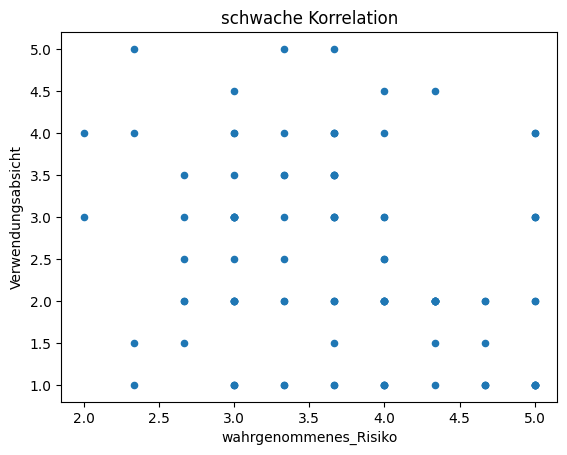

In [16]:
df.plot.scatter(x='wahrgenommenes_Risiko', y='Verwendungsabsicht', title='schwache Korrelation');

 Basierend auf dem Koeffizienten __0.69478872__ für "Leistungserwartung" (hier ist p=0) ist eine signifikante Korrelation erkennbar, dies ist unten auf dem Scatter Plot sichbar.

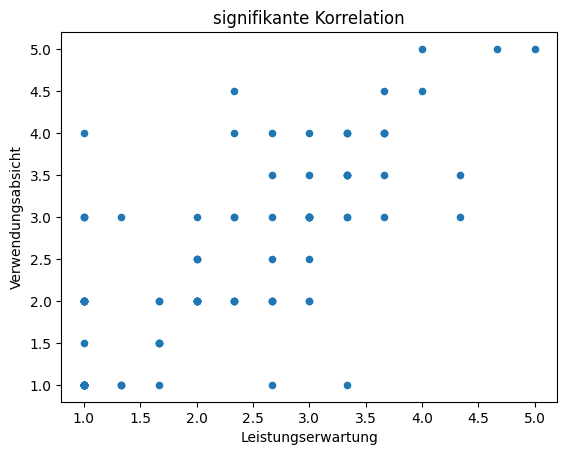

In [29]:
df.plot.scatter(x='Leistungserwartung', y='Verwendungsabsicht', title='signifikante Korrelation');

## Analyse der Korrelation von unabhänigen Variablen (Features).

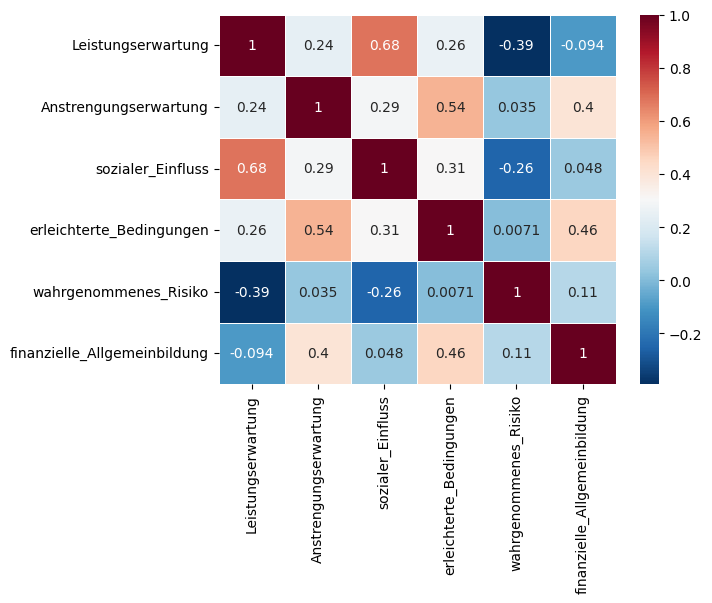

In [30]:
p_correlation=X.corr(method='pearson')


sb.heatmap(p_correlation, 
            xticklabels=p_correlation.columns,
            yticklabels=p_correlation.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

plt.show()